# Data Handling and Visualization- Speech Enhancement

In [4]:
import scipy

In [5]:
from scipy.io.wavfile import read,write
from IPython import display as IPD
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.fft import fft, fftfreq,ifft
from scipy.signal import stft,istft

## Taking Input audio file and audio file with noise as input

In [6]:
sr_input, audio_input= read("test.wav")
#sr_input is the sample rate (number of samples of audio recorded every second) and audio_input is the data

sr_noise, noise = read("test_noise.wav")
#sr_noise is the sample rate (number of samples of audio recorded every second) and noise is the data
print(audio_input.shape, sr_input)
print(noise.shape, sr_noise)

(64000,) 16000
(64000,) 16000


In [7]:
IPD.Audio("test.wav")

In [8]:
IPD.Audio("test_noise.wav")

## Plotting input_audio and noisy data

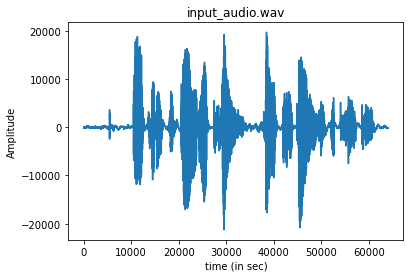

In [9]:
plt.plot(audio_input)
plt.title("input_audio.wav")
plt.xlabel("time (in sec)")
plt.ylabel("Amplitude")
plt.show()

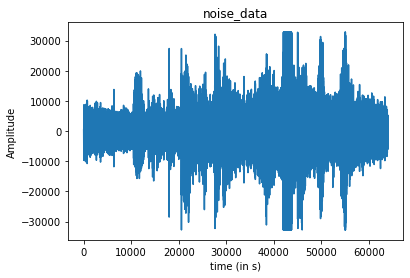

In [10]:
plt.plot(noise)
plt.title("noise_data")
plt.xlabel("time (in s)")
plt.ylabel("Amplitude")
plt.show()

## Moving Average Filter (Time Domain Filtering)

In [11]:
def moving_avg(audio_input,window_size):
    y =[]
    index=(window_size-1)//2
    for i in range(index,audio_input.shape[0]-index):
        r= float(np.sum(audio_input[i-index:i+index+1])/window_size)
        y.append(r)
    return np.array(y).astype(np.int16)

In [12]:
moving_avg_out = moving_avg(noise,5)
write("moving_avg_out.wav",sr_input,moving_avg_out)
IPD.Audio("moving_avg_out.wav")

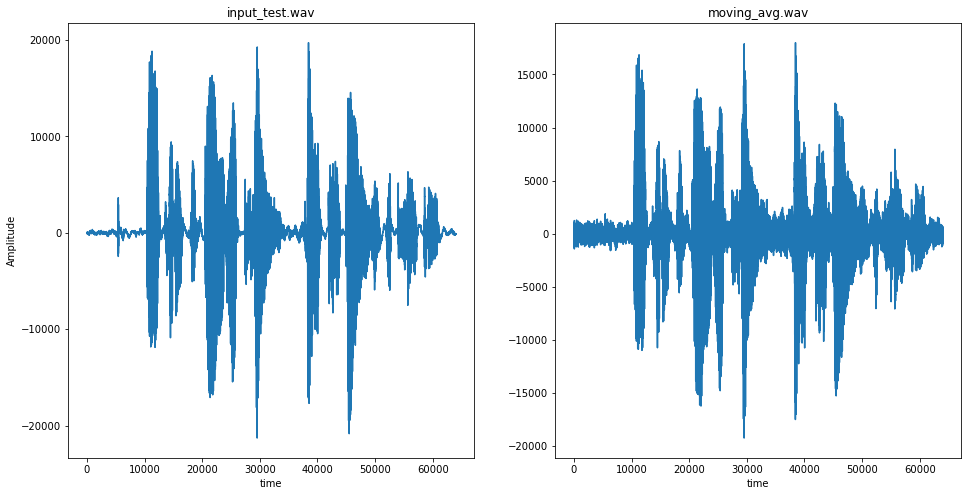

In [13]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(audio_input)
ax1.set_title("input_test.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(moving_avg_out)
#ax2.get_yaxis().set_visible(False) 
ax2.set_title("moving_avg.wav")
ax2.set_xlabel("time") 
plt.show()

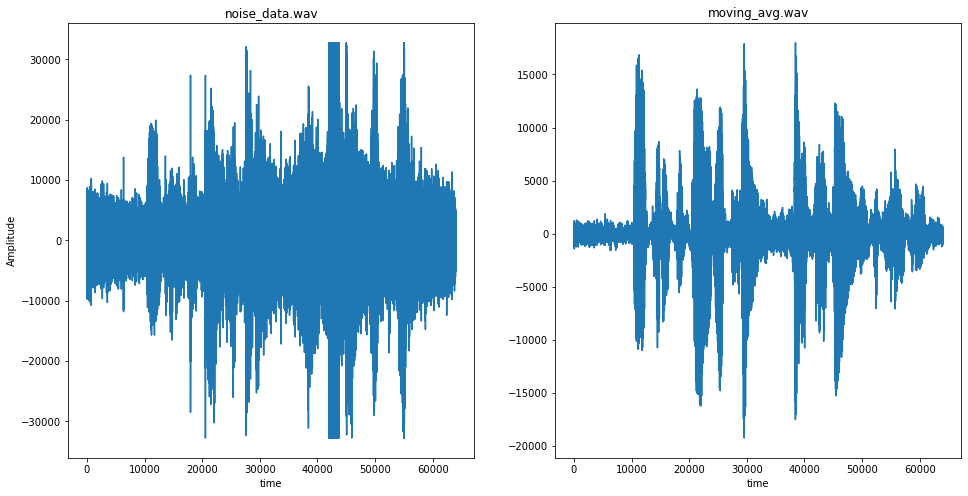

In [14]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(noise)
ax1.set_title("noise_data.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(moving_avg_out)
#ax2.get_yaxis().set_visible(False) 
ax2.set_title("moving_avg.wav")
ax2.set_xlabel("time") 
plt.show()

## Frequency domain filtering

In [15]:
def plot_fft(N,sr_input,audio_input):
    T = 1.0 / sr_input
    audio_input_f = fft(audio_input)    #Computed Fourier transform of audio input
    xf = fftfreq(N, T)[:N//2]      #calculates the frequencies in the center of each bin in the output of fft()
    plt.plot(xf, 2.0/N * np.abs(audio_input_f[0:N//2]))
    plt.xlabel("Frequency")
    plt.ylabel("X(Jw)")
    plt.grid()
    plt.show()

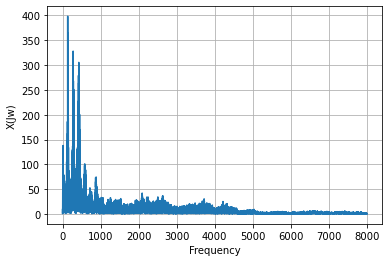

In [16]:
plot_fft(audio_input.shape[0],sr_input,audio_input)

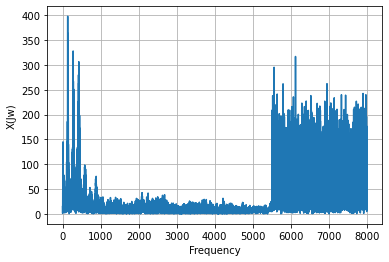

In [17]:
plot_fft(audio_input.shape[0],sr_noise,noise)

In [18]:
def f_domain_filter(N,sr_input,audio_input,cutoff_f, low_pass=True):
    fft_x = fft(audio_input)
    T = 1.0 / sr_input
    xf = fftfreq(N, T) 
    mask=np.ones(audio_input.shape[0])
    
    if low_pass:
        mask = np.abs(xf)<cutoff_f
    else:
        mask = np.abs(xf)>cutoff_f
    
    fft_y = fft_x*mask
    return (ifft(fft_y).astype(np.int16))
    

In [19]:
fft_filter_out = f_domain_filter(audio_input.shape[0],sr_noise,noise,3000)
write("fft_filter_out.wav",sr_input,fft_filter_out)
IPD.Audio("fft_filter_out.wav")

<ipython-input-18-e27ba23a66a6>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  return (ifft(fft_y).astype(np.int16))


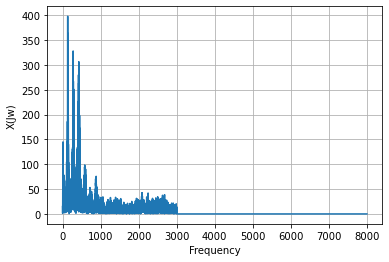

In [20]:
plot_fft(audio_input.shape[0],sr_input,fft_filter_out)

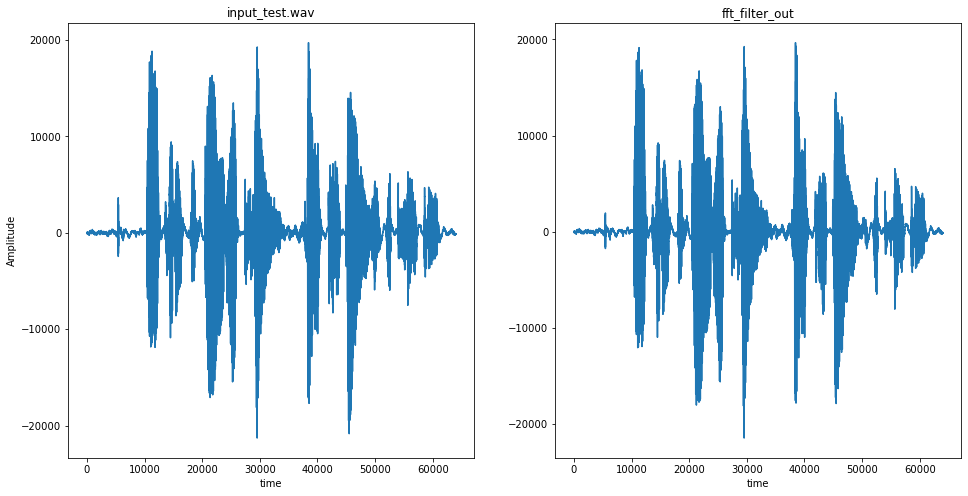

In [21]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(audio_input)
ax1.set_title("input_test.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(fft_filter_out)
#ax2.get_yaxis().set_visible(False) 
ax2.set_title("fft_filter_out")
ax2.set_xlabel("time") 
plt.show()

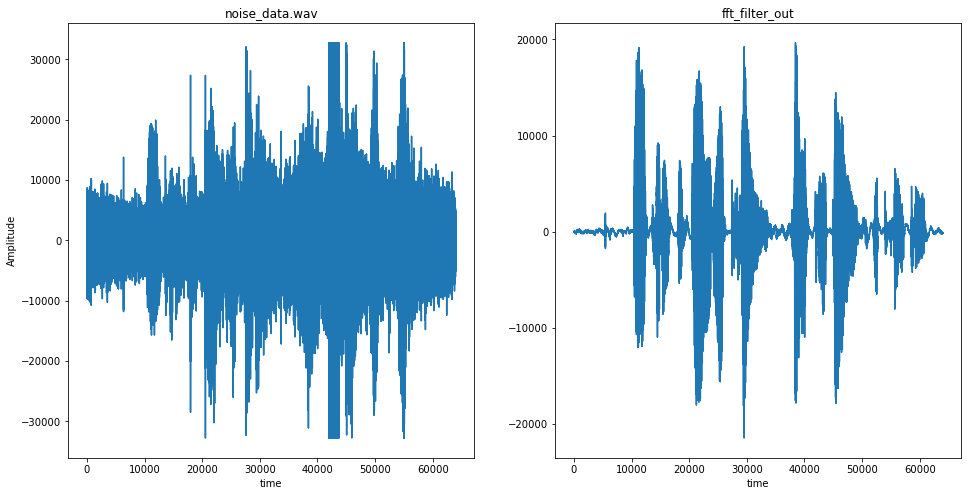

In [22]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(noise)
ax1.set_title("noise_data.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(fft_filter_out)
#ax2.get_yaxis().set_visible(False) 
ax2.set_title("fft_filter_out")
ax2.set_xlabel("time") 
plt.show()

## Spectral Subtraction

In [23]:
sr_noiseonly, noise_only= read("Noise_only.wav")
IPD.Audio("Noise_only.wav")

In [24]:
f,t,s = stft(noise,sr_noise, nperseg= 1000)
modulus_s = np.abs(s)
angle_s = np.angle(s)
phase_s = np.exp(1.0j*angle_s)
    
f1, t1,ns= stft(noise_only, sr_noiseonly,nperseg=  1000)
modulus_ns = np.abs(ns)
mean_mod_ns = np.mean(modulus_ns,axis=1)
    

In [26]:
res_mod = modulus_s-mean_mod_ns.reshape((mean_mod_ns.shape[0],1))

res = res_mod*phase_s  
dtimes,res_inv = istft(res,sr_input)
s_sub_out=res_inv.astype(np.int16)

In [27]:
write("s_sub_out.wav",sr_input,s_sub_out)
IPD.Audio("s_sub_out.wav")

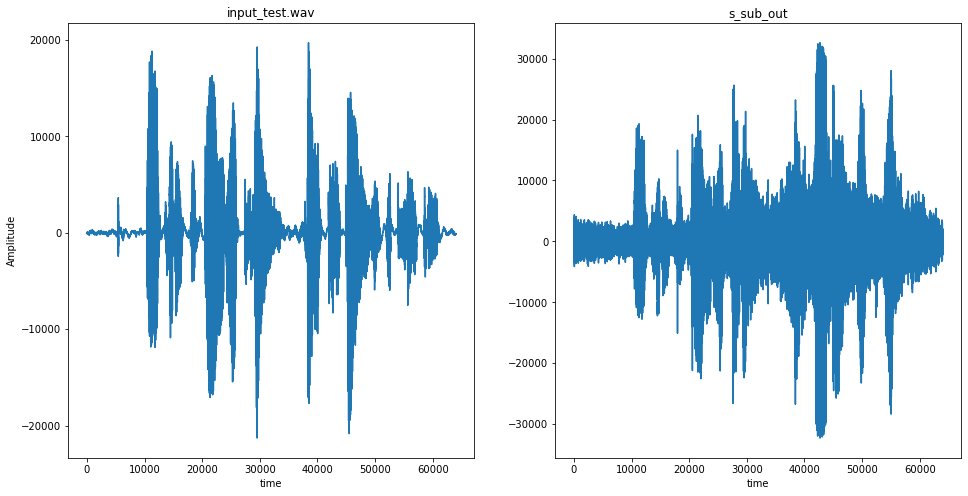

In [28]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(audio_input)
ax1.set_title("input_test.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(s_sub_out)
#ax2.get_yaxis().set_visible(False) 
ax2.set_title("s_sub_out")
ax2.set_xlabel("time") 
plt.show()

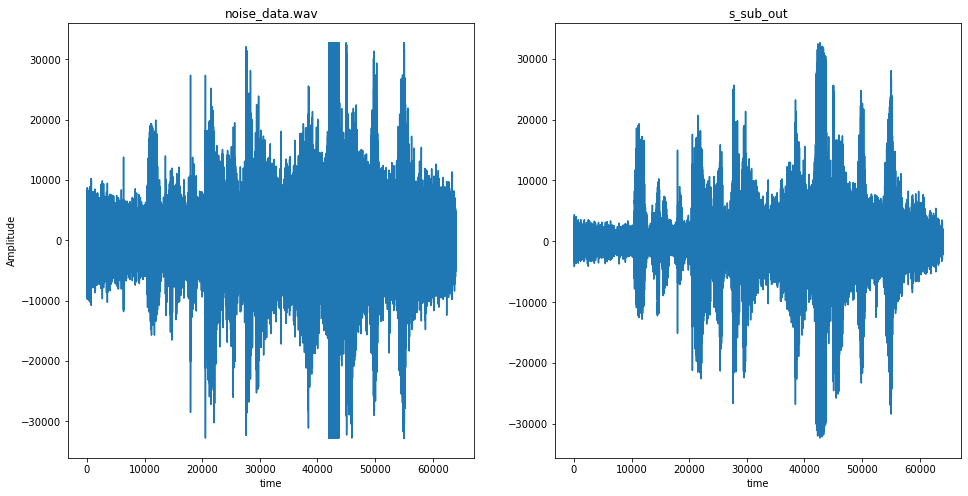

In [29]:
f,(ax1,ax2)=plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
ax1.plot(noise)
ax1.set_title("noise_data.wav")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")

ax2.plot(s_sub_out)
#ax2.get_yaxis().set_visible(False) 
ax2.set_title("s_sub_out")
ax2.set_xlabel("time") 
plt.show()

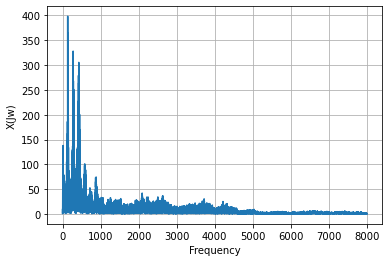

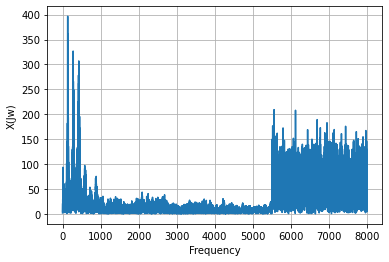

In [30]:
plot_fft(audio_input.shape[0],sr_input,audio_input)
plot_fft(s_sub_out.shape[0],sr_input,s_sub_out)